<a href="https://colab.research.google.com/github/huyunwei/robust/blob/main/robust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Robust Design
## Tolerance Analysis
### Monte Carlo Simulation   

Monte Carlo simulation is a useful method for performing tolerance stack-up analysis. This method relies on statistical sampling to obtain a numerical result.  

Here's a simple example of using Monte Carlo simulation to perform tolerance stack-up analysis. Suppose we have a system with three components, each with its own nominal dimension and tolerance.  

We'll create a Python script to perform 10,000 simulations and understand the distribution of the total stack-up.  

This script defines the nominal dimensions and tolerances of the components and then simulates the total stack-up using random numbers from a normal distribution with means equal to the nominal dimensions and standard deviations equal to the tolerances.

The resulting histogram shows the distribution of the total stack-up over the simulations, which helps in understanding the variability in the system due to the tolerances of the individual components.

In [52]:
import random
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from io import StringIO

from Tol_MC import *

df_csv = """name,nominal,upper_tol,lower_tol,sigma_level
B1, 50, 0.5, -0.5, 3
B2, 20, 01, -0.1, 3
B3, 30, 0.2, -0.2, 3
E, 100.1, 0.3, -0.3, 3
"""
df_X = read_and_prepare_df(StringIO(df_csv))
df_X


,name,nominal,upper_tol,lower_tol,sigma_level,max,min,mean,std
0,B1,50,0.5,-0.5,3,50.5,49.5,50,0.166667
1,B2,20,1,-0.1,3,21,19.9,20.45,0.183333
2,B3,30,0.2,-0.2,3,30.2,29.8,30,0.0666667
3,E,100.1,0.3,-0.3,3,100.4,99.8,100.1,0.1


In [53]:
transf_formula = "Gap = E - B1 - B2 - B3"
N_SIM = int(1e6)

if df_X is not None:
    results = monte_carlo_tolerancing(df_X, transf_formula , N_SIM)
    print(results.describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]))
else:
    print("Error: Data frame could not be prepared.")

            B1      B2        B3        E       Gap
count    1e+06   1e+06     1e+06    1e+06     1e+06
mean        50 20.4503        30    100.1 -0.350366
std   0.166598 0.18331 0.0666199 0.100026  0.275136
min    49.2595 19.5556   29.6616  99.6304  -1.66105
1%     49.6127 20.0238    29.845  99.8677 -0.990185
5%      49.726 20.1491   29.8903  99.9355 -0.803098
25%    49.8876 20.3265   29.9551  100.032  -0.53614
50%         50 20.4504   30.0001    100.1  -0.35009
75%    50.1124  20.574   30.0449  100.167  -0.16472
95%    50.2739 20.7514   30.1095  100.264  0.101942
99%     50.388 20.8774   30.1553  100.332  0.288968
max     50.817 21.3244    30.313  100.582  0.865127


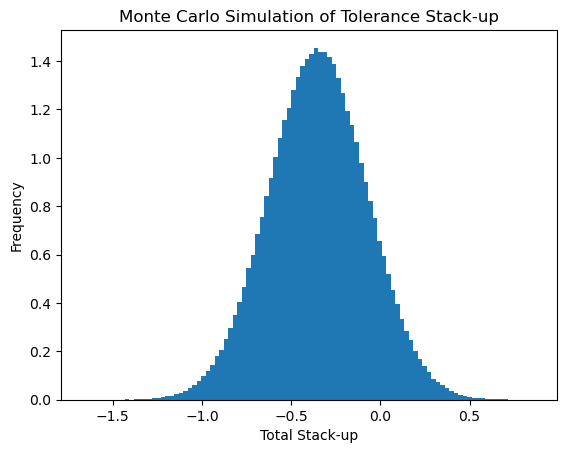

In [54]:
# Plot histogram
plt.hist(results.Gap, bins=100, density=True)
plt.xlabel('Total Stack-up')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation of Tolerance Stack-up')
plt.show()

In [55]:
path_to_csv = "resistors.csv"
transf_formula = "G = R1 / (R1 + R2)"
N_SIM = int(1e6)
df_X = read_and_prepare_df(path_to_csv)
df_X


,name,nominal,upper_tol,lower_tol,sigma_level,max,min,mean,std
0,R1,1,0.02,-0.02,4,1.02,0.98,1,0.005
1,R2,1,0.02,-0.02,4,1.02,0.98,1,0.005


In [56]:
if df_X is not None:
    results = monte_carlo_tolerancing(df_X, transf_formula, N_SIM)
    print(results.describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]))
else:
    print("Error: Data frame could not be prepared.")

             R1         R2          G
count     1e+06      1e+06      1e+06
mean          1          1        0.5
std   0.0050002 0.00499768 0.00176844
min    0.976052   0.975497   0.491747
1%     0.988359   0.988345   0.495888
5%     0.991771   0.991779   0.497092
25%    0.996628   0.996637   0.498807
50%     1.00001    1.00001   0.500002
75%     1.00338    1.00337   0.501191
95%     1.00823    1.00821   0.502913
99%     1.01158    1.01163   0.504109
max     1.02435    1.02389   0.507738


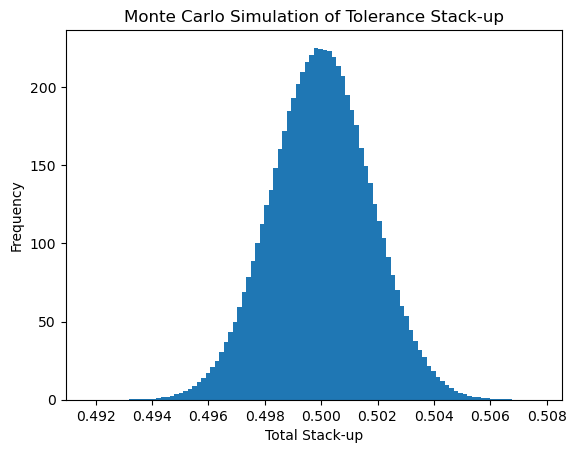

In [57]:
# Plot histogram
plt.hist(results.G, bins=100, density=True)
plt.xlabel('Total Stack-up')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation of Tolerance Stack-up')
plt.show()

In [59]:
print(f'The RSS calcuated standard divation of G is {0.005*np.sqrt(2)/4:.8g}')
print(f'The simulated Standard Deviation of G is {results.G.std():.8f}') 

The RSS calcuated standard divation of G is 0.001767767
The simulated Standard Deviation of G is 0.00176844:


The stress-strength model is a fundamental concept in reliability engineering and design that assesses the reliability or probability of failure of a system, component, or structure by comparing the applied stress to the strength of the material or component. The basic idea is that for a component to function reliably, its strength (the capacity to withstand loads or forces) must exceed the stress (the load or force applied) it experiences during operation.

### Stress (\(S\)):
- Stress represents the demands, loads, pressures, or forces applied to a component. It can vary due to operational conditions, environmental factors, or the way the component is used.

### Strength (\(R\)):
- Strength is the ability of the component to withstand stress without failure. It reflects the material properties, design, manufacturing quality, and sometimes the degradation over time.

### Probability of Failure (\(P_f\)):
The probability of failure occurs when the applied stress exceeds the component's strength (\(P(S > R)\)). In other words, it is the probability that the strength of a component is less than or equal to the applied stress. 

If both stress and strength are considered as random variables with known probability distributions, the probability of failure can be calculated by integrating the joint probability density function (PDF) of stress and strength over the region where stress exceeds strength. However, when stress (\(S\)) and strength (\(R\)) are independent and normally distributed, the probability of failure can be simplified and calculated using:

$$P_f = P(S > R) = \Phi\left(\frac{\mu_S - \mu_R}{\sqrt{\sigma_S^2 + \sigma_R^2}}\right)$$

where:
- $\mu_S$ and $\mu_R$ are the mean values of stress and strength, respectively,
- $\sigma_S^2$ and $\sigma_R^2$ are the variances of stress and strength, respectively,
- $\Phi$ is the cumulative distribution function (CDF) of the standard normal distribution.

### Application:
The stress-strength model is widely used in the design phase to ensure the reliability of components and systems. By understanding and quantifying the stress and strength distributions, designers and engineers can make informed decisions to reduce the probability of failure, such as by selecting appropriate materials, design adjustments, or safety factors.

### Importance:
This model emphasizes the importance of variability and uncertainty in both applied stresses and material strengths. It provides a quantitative method to assess the impact of this variability on system reliability, helping in the identification of potential failure points and the development of more robust designs.


In [41]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


class StressStrengthModel:
    def __init__(self, mean_strength, std_strength, mean_stress, std_stress):
        """
        Initialize the stress-strength model with means and standard deviations
        for strength and stress distributions.

        Args:
        - mean_strength (float): Mean of the strength distribution.
        - std_strength (float): Standard deviation of the strength distribution.
        - mean_stress (float): Mean of the stress distribution.
        - std_stress (float): Standard deviation of the stress distribution.
        """
        self.mean_strength = mean_strength
        self.std_strength = std_strength
        self.mean_stress = mean_stress
        self.std_stress = std_stress


    
    def probability_of_failure(self, method='equation'):
        """
    Calculates the probability of failure given the means and standard deviations
    of stress and strength distributions.

    Args:
    - mean_stress (float): Mean of the stress distribution.
    - std_stress (float): Standard deviation of the stress distribution.
    - mean_strength (float): Mean of the strength distribution.
    - std_strength (float): Standard deviation of the strength distribution.
    - method (str): Calculation method ('equation' or 'monte_carlo').

    Returns:
    - float: Probability of failure.
            """
        if method == 'equation':
            # Calculate the Z score
            Z = (self.mean_strength - self.mean_stress) / np.sqrt(self.std_stress**2 + self.std_strength**2)
            # Calculate the probability of failure using the standard normal CDF
            probability_failure = norm.cdf(-Z)
            return probability_failure
    
        elif method == 'monte_carlo':
            # Number of simulations
            n_simulations = 1000000
            # Generate random samples from normal distributions for stress and strength
            stress_samples = np.random.normal(self.mean_stress, self.std_stress, n_simulations)
            strength_samples = np.random.normal(self.mean_strength, self.std_strength, n_simulations)
            # Calculate failure instances
            failures = stress_samples > strength_samples
            # Calculate probability of failure
            probability_failure = np.mean(failures)
            return probability_failure
    
        else:
            raise ValueError("Method not recognized. Use 'equation' or 'monte_carlo'.")

    def plot_distributions(self):
        """
        Plot the stress and strength distributions to visualize the overlap.
        """
        # Generate a range of x-values for plotting
        x = np.linspace(
            min(self.mean_strength - 4 * self.std_strength, self.mean_stress - 4 * self.std_stress),
            max(self.mean_strength + 4 * self.std_strength, self.mean_stress + 4 * self.std_stress),
            1000,
        )

        # Calculate the corresponding normal distribution for strength and stress
        strength_distribution = norm.pdf(x, self.mean_strength, self.std_strength)
        stress_distribution = norm.pdf(x, self.mean_stress, self.std_stress)

        # Plot the distributions
        plt.figure(figsize=(10, 6))
        plt.plot(x, strength_distribution, label="Strength Distribution", color='b')
        plt.plot(x, stress_distribution, label="Stress Distribution", color='r')
        plt.fill_between(x, stress_distribution, 
                         color='tab:red', alpha=0.2, 
                         )
        plt.fill_between(x, strength_distribution, 
                         # where=(strength_distribution < stress_distribution ), 
                         color='tab:blue', alpha=0.2, )
        plt.xlabel("Stress/Strength")
        plt.ylabel("Probability Density")
        plt.title("Stress-Strength Interference Model")
        plt.legend()
        plt.show()


Probability of failure (Monte Carlo simulation): 0.038524
Probability of failure (normal equation): 0.038550


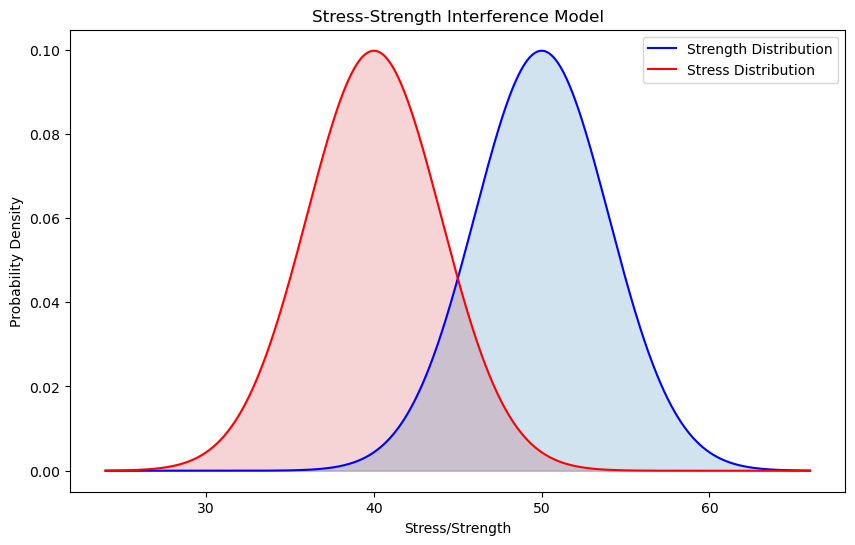

In [42]:
ssa = StressStrengthModel(
    mean_stress = 40,  # Mean of stress distribution,
    std_stress = 4,   # Standard deviation of stress distribution
    mean_strength = 50,  # Mean of strength distribution
    std_strength = 4   # Standard deviation of strength distribution
)

print(f"Probability of failure (Monte Carlo simulation): {ssa.probability_of_failure(method = 'monte_carlo'):.6f}")
print(f"Probability of failure (normal equation): {ssa.probability_of_failure():.6f}")
ssa.plot_distributions()

Stress - Strength Interference
Stress Distribution: Normal Distribution (μ=40,σ=4)
Strength Distribution: Normal Distribution (μ=50,σ=4)
Probability of failure (stress > strength): 3.85499 %


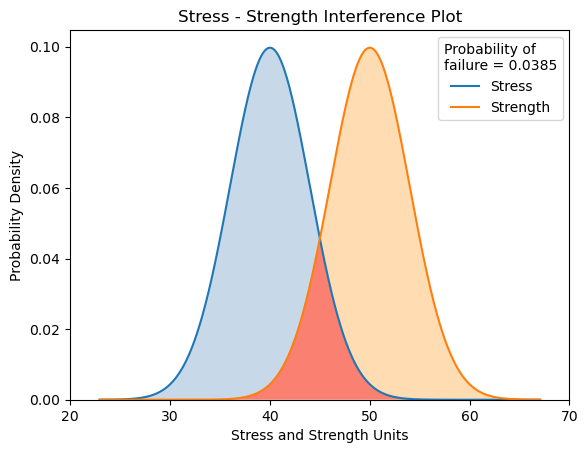

In [49]:
from reliability import Distributions
from reliability.Other_functions import stress_strength_normal

stress = Distributions.Normal_Distribution(mu=40,sigma=4)
strength = Distributions.Normal_Distribution(mu=50,sigma=4)
stress_strength_normal(stress=stress, strength=strength)
plt.xlim(20,70)
plt.show()

Stress - Strength Interference
Stress Distribution: Weibull Distribution (α=2,β=3,γ=1)
Strength Distribution: Gamma Distribution (α=2,β=3,γ=3)
Probability of failure (stress > strength): 0.17078 %


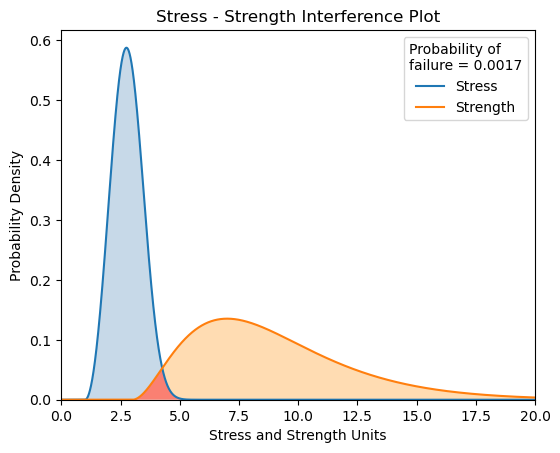

In [51]:
from reliability.Other_functions import stress_strength
stress = Distributions.Weibull_Distribution(alpha=2, beta=3, gamma=1)
strength = Distributions.Gamma_Distribution(alpha=2, beta=3, gamma=3)
stress_strength(stress=stress, strength=strength)
plt.xlim(0,20)
plt.show()

Fitting a Weibull distribution to right-censored time-to-failure data involves statistical methods to estimate the shape and scale parameters of the distribution. Libraries like scipy provide optimization methods for parameter estimation.

Below is a Python code snippet using scipy.optimize to fit a Weibull distribution to right-censored data. For this example, let's assume we have a data set containing time-to-failure data and some censored data points:

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 20/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         28.1696         3.57032   21.9733   36.1131
     Beta         1.86308         0.32449   1.32428   2.62111 

Goodness of fit    Value
 Log-likelihood -79.5482
           AICc  163.802
            BIC  165.088
             AD  0.83728 



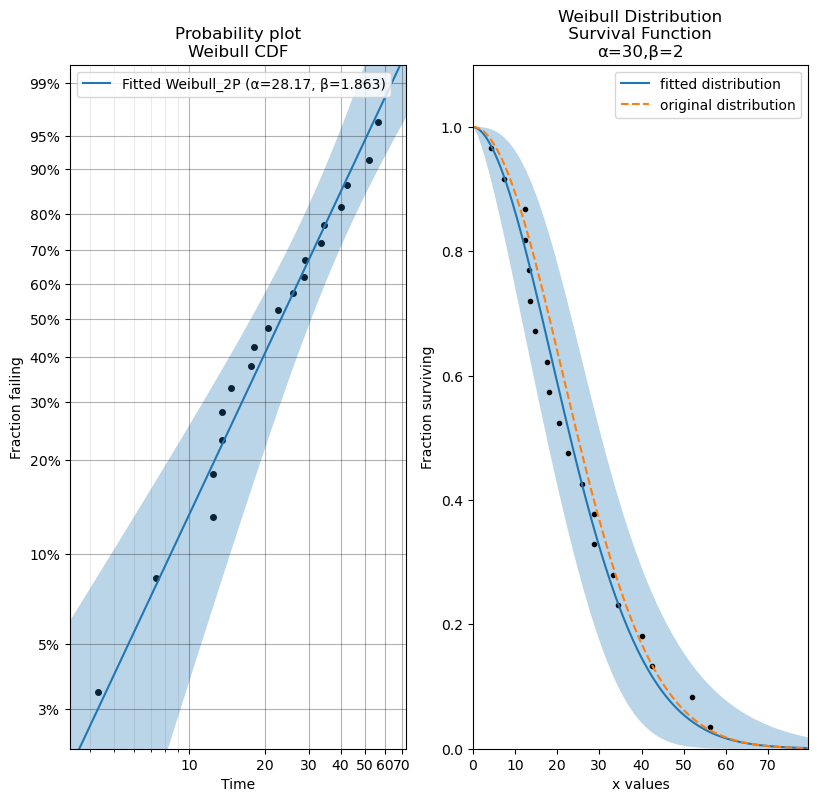

In [58]:
from reliability.Distributions import Weibull_Distribution
from reliability.Fitters import Fit_Weibull_2P
from reliability.Probability_plotting import plot_points
import matplotlib.pyplot as plt

dist = Weibull_Distribution(alpha=30, beta=2)  # creates the distribution object
data = dist.random_samples(20, seed=42)  # draws 20 samples from the distribution. Seeded for repeatability
plt.subplot(121)
fit = Fit_Weibull_2P(failures=data)  # fits a Weibull distribution to the data and generates the probability plot
plt.subplot(122)
fit.distribution.SF(label='fitted distribution')  # uses the distribution object from Fit_Weibull_2P and plots the survival function
dist.SF(label='original distribution', linestyle='--') # plots the survival function of the original distribution
plot_points(failures=data, func='SF')  # overlays the original data on the survival function
plt.legend()
plt.show()

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 4/2 (33.33333% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         78.6413         28.8663   38.3007   161.471
     Beta         1.38131        0.617086  0.575478   3.31556 

Goodness of fit    Value
 Log-likelihood -21.4796
           AICc  50.9592
            BIC  46.5427
             AD  18.1853 



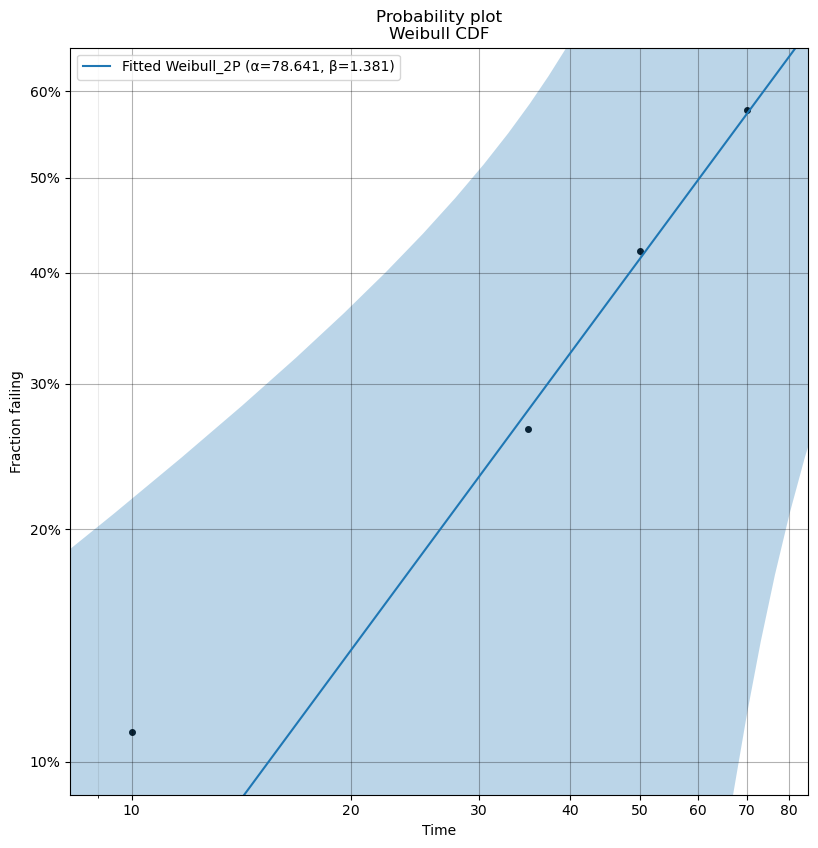

In [65]:
# Example time-to-failure data
data = np.array([10, 35, 50, 70])
# Example right-censored data
censored_data = np.array([80, 90])
fit = Fit_Weibull_2P(failures=data, right_censored=censored_data) 
fit

In [62]:
from scipy.optimize import minimize
import numpy as np

def weibull_pdf(x, shape, scale):
    return (shape / scale) * ((x / scale) ** (shape - 1)) * np.exp(-((x / scale) ** shape))

def weibull_log_likelihood(params, data, censored_data):
    shape, scale = params
    # Calculate the log-likelihood for non-censored (failed) data
    log_likelihood = np.sum(np.log(weibull_pdf(data, shape, scale)))
    # For right-censored data, the log-likelihood is calculated using the survival function: 1 - CDF
    log_likelihood += np.sum(-(shape / scale) * ((censored_data / scale) ** shape))
    # We return the negative log-likelihood because scipy's "minimize" seeks to find the minimum value of the given function
    return -log_likelihood

# Example time-to-failure data
data = np.array([10, 35, 50, 70])
# Example right-censored data
censored_data = np.array([80, 90])

# Initial guesses for shape and scale parameters
initial_guess = [1.3, 50]

# Optimization to fit Weibull distribution
result = minimize(weibull_log_likelihood, initial_guess, args=(data, censored_data), bounds=[(0.01, 10), (0.01, 100)])

# Resulting shape and scale parameters
shape, scale = result.x

print(f"Shape parameter: {shape}")
print(f"Scale parameter: {scale}")



Shape parameter: 1.8012462759576051
Scale parameter: 48.0148003624413


In [63]:
dist = Weibull_Distribution(alpha=30, beta=2)  # creates the distribution object
data = dist.random_samples(20, seed=42)  # draws 20 samples from the distribution. Seeded for repeatability

initial_guess = [1.3, 50]

# Optimization to fit Weibull distribution
result = minimize(weibull_log_likelihood, initial_guess, args=(data, []), bounds=[(0.01, 10), (0.01, 100)])

# Resulting shape and scale parameters
shape, scale = result.x
print(f"Shape parameter: {shape}")
print(f"Scale parameter: {scale}")

Shape parameter: 1.8630843559609829
Scale parameter: 28.169564901880527


In [7]:
# import altair with an abbreviated alias
import altair as alt
alt.renderers.enable('mimetype')

# load a sample dataset as a pandas DataFrame
from vega_datasets import data
cars = data.cars()

# make the chart
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting
